In [132]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [226]:
crimes = pd.read_csv("processed_data/crime.csv")

In [238]:
crimes.columns

Index(['statename', 'distname', 'YEAR', 'MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'THEFT', 'AUTO THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE',
       'OTHER IPC CRIMES', 'Total Crimes'],
      dtype='object')

In [228]:
mp = gpd.read_file('map/India.shp')
mp.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


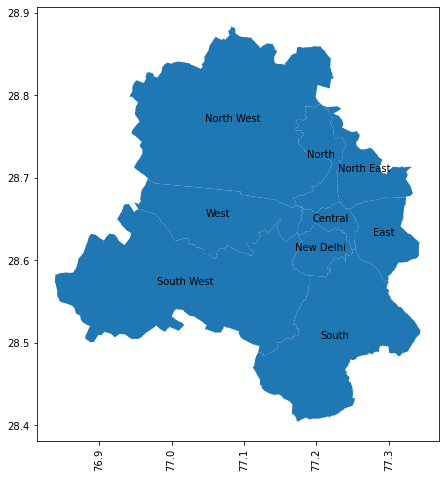

In [242]:
def generateMap(india_map, state):
    state_map = india_map[india_map["statename"]==state]
    fig, ax = plt.subplots(1, figsize=(8, 8))
    plt.xticks(rotation=90)
    ax = state_map.plot(ax=ax)
    state_map.apply(lambda x: ax.annotate(text=x["distname"], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
    
generateMap(mp, "Nct Of Delhi")

In [220]:
os.listdir('processed_data')

['.ipynb_checkpoints', 'arms_act.csv', 'crime.csv', 'gunda_act.csv', 'ipc.csv']

In [274]:
def generateHeatMap(india_map, df, state, crime):
    state_map = india_map[india_map["statename"]==state]
    heat_map = state_map.merge(df, on=["distname", "statename"])
    fig, ax = plt.subplots(1, figsize=(15, 15))
    plt.xticks(rotation=90)
    plt.title(f'{crime} in {state}')
    ax = heat_map.plot(column=crime, cmap="Reds", linewidth=0.4, ax=ax, edgecolor="0.4")
    heat_map.apply(lambda x: ax.annotate(text=x["distname"], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
    bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
    bar_info._A = []
    cbar = fig.colorbar(bar_info)

In [275]:
gunda = pd.read_csv('processed_data/gunda_act.csv')


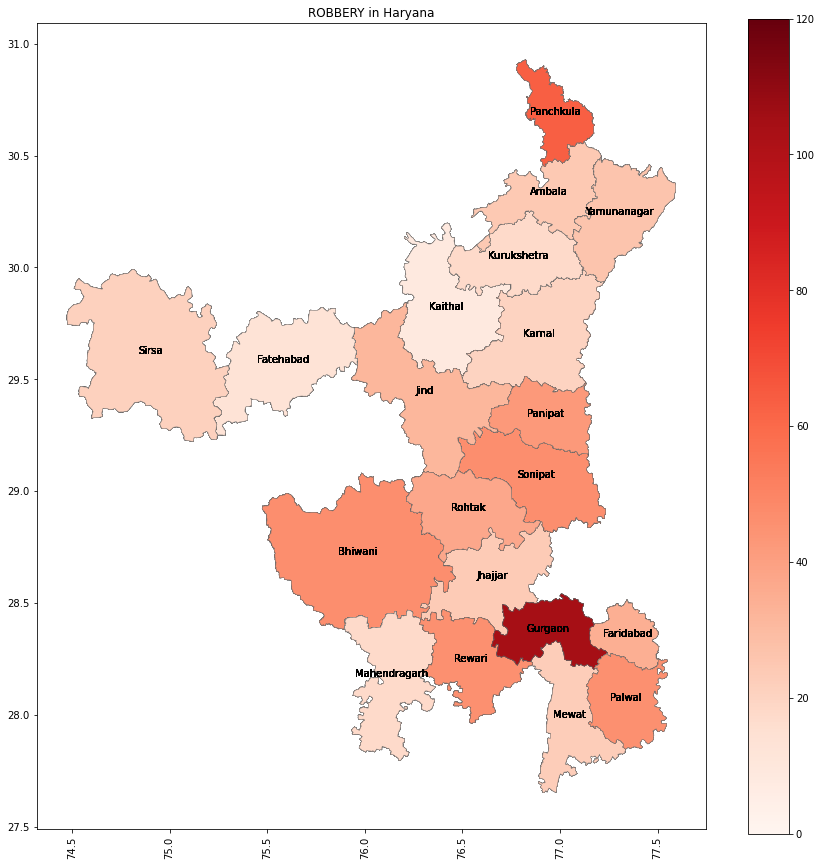

In [276]:
generateHeatMap(mp, gunda, "Haryana", "ROBBERY")

In [298]:
def getDataFromCsv(act="IPC"):
    dirs = {"Arms Act": 'arms_act.csv', "Gunda Act": 'gunda_act.csv',"IPC": 'ipc.csv'}
    data = pd.read_csv("processed_data\\"+dirs[act])
    cols = data.columns[3:]
    return data, cols
    

In [301]:
def final(act="IPC", crime="ARSON", state="Uttar Pradesh"):
    crime = crime.upper()
    mp = gpd.read_file('map/India.shp')
    try:
        arson, cols = getDataFromCsv(act)
    except:
        return False
    if crime not in cols:
        return False
    states = arson.statename.unique()
    if state not in states:
        return False
    try:
        generateHeatMap(mp, arson, state, crime)
    except:
        return False

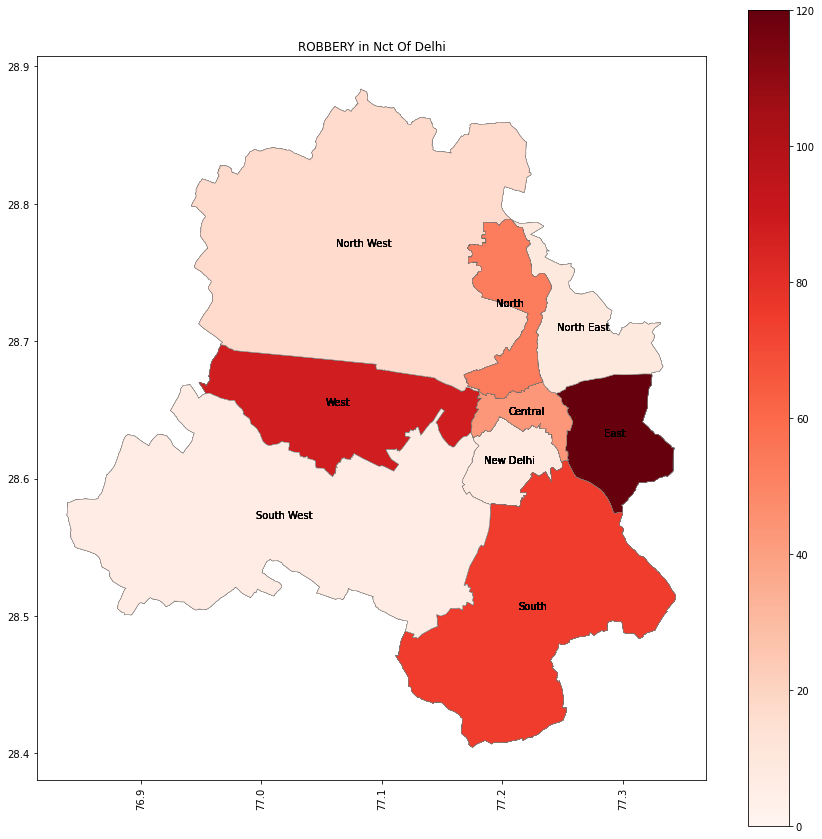

In [302]:
#getDataFromCsv("Arms Act")
final("Gunda Act", "ROBBERY", "Nct Of Delhi")